<a href="https://colab.research.google.com/github/veruizr/ML_Doc/blob/main/hopfield_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# #Red de hopfield para establecer la ruta que dure el menor tiempo y pase
# solamente una vez por cada ciudad

import polars as pl
import numpy as np

# Datos de la tabla de tiempos de viaje
data = {
    "Ciudad": ["Bogotá", "Cali", "Buenaventura", "Medellín", "Cúcuta", "Pereira"],
    "Bogotá": [0, 18, 22, 12, 20, 10],
    "Cali": [18, 0, 4, 10, 26, 8],
    "Buenaventura": [22, 4, 0, 14, 30, 12],
    "Medellín": [12, 10, 14, 0, 18, 6],
    "Cúcuta": [20, 26, 30, 18, 0, 20],
    "Pereira": [10, 8, 12, 6, 20, 0],
}

# Crear el DataFrame
df = pl.DataFrame(data)
print("Tabla de tiempos de viaje:")
print(df)

# Convertir la tabla a una matriz de distancias
distancias = df.select(pl.exclude("Ciudad")).to_numpy()
ciudades = df["Ciudad"].to_list()
n_ciudades = len(ciudades)

# Implementación red de Hopfield
def hopfield_tsp(distancias, max_iter=1000):
    n = distancias.shape[0]
    # Inicializar la matriz de estado de la red (una ciudad por fila, un paso por columna)
    estado = np.random.rand(n, n)

    # Función de activación (sigmoide)
    def sigmoide(x):
        return 1 / (1 + np.exp(-x))

    # Iterar para minimizar la energía
    for _ in range(max_iter):
        # Calcular la energía y actualizar el estado
        energia = np.zeros((n, n))
        for i in range(n):
            for j in range(n):
                # Restricción: solo se puede pasar una vez por ciudad
                energia[i, j] = -np.sum(estado[i, :]) - np.sum(estado[:, j]) + estado[i, j]
                # Minimizar la distancia total
                for k in range(n):
                    energia[i, j] -= distancias[i, k] * estado[k, (j + 1) % n]

        # Actualizar el estado
        estado = sigmoide(energia)

    # Convertir el estado a una ruta
    ruta = np.argmax(estado, axis=1)
    return ruta

# Ejecutar la red de Hopfield
ruta_indices = hopfield_tsp(distancias)
ruta = [ciudades[i] for i in ruta_indices]

# Mostrar la ruta encontrada
print("\nRuta encontrada:")
print(" -> ".join(ruta))

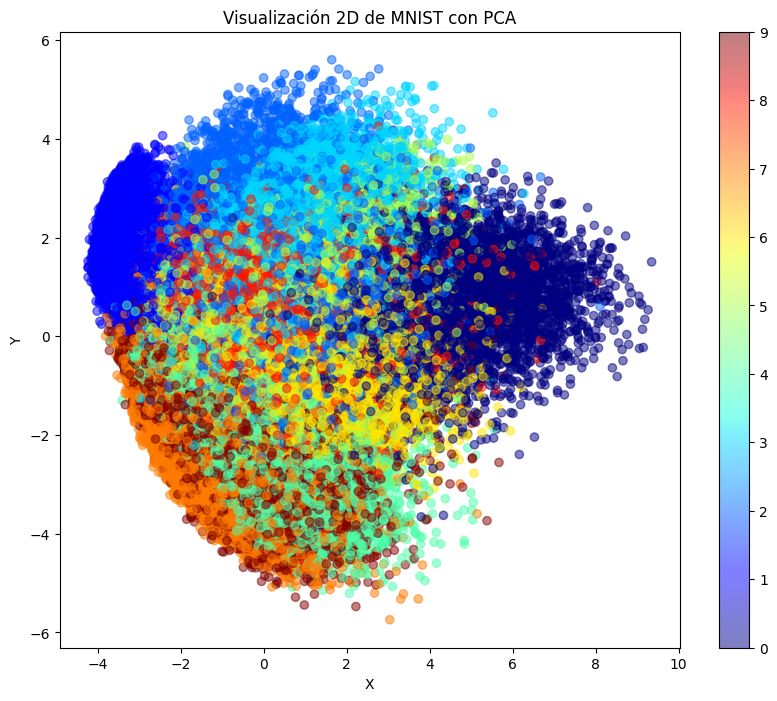

In [3]:
#uso de PCA para visualizar en 2D una base de datos MNIST
# se usa sklearn para el trabajo

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Paso 1: Cargar MNIST
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)

# Paso 2: Normalizar los datos
X_normalized = X / 255.0

# Paso 3: Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

# Paso 4: Visualización
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='jet', alpha=0.5)
plt.colorbar(scatter)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Visualización 2D de MNIST con PCA')
plt.show()